<a href="https://colab.research.google.com/github/ntuananh/Machine-Learning-Journey/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Regression</h1>

<p> This is a mini project to apply regression.</p>

Dataset: <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">Wine Quality Data Set</a> from UCI Machine Learning Repository 

In [0]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
# get dataset from UCI website
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

df = pd.read_csv(url, header=0, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h2>Some descriptive statistic<h2>

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


So every column has 1599 values and all the values are number. Therefore,  no need to perform data preparation.

<h2> Naive approach</h2>
<h4>Just push all variables into a linear model and see what happen.</h4>


In [0]:
# get features and target columns
y = df.pop('quality')
X = df

In [6]:
# split the dataset into train and and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print("Coefficient of determination R^2: " + str(model.score))
print("Estimated intercept coefficient: " + str(model.intercept_))
print ("Estimated other coefficients: ")
pd.DataFrame(list(zip(X.columns, model.coef_)), columns=['Column', 'Coefficient'])

Coefficient of determination R^2: <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>
Estimated intercept coefficient: 18.58131539348606
Estimated other coefficients: 


,Column,Coefficient
0,fixed acidity,0.016676
1,volatile acidity,-1.115637
2,citric acid,-0.126970
3,residual sugar,0.003561
4,chlorides,-2.072233
5,free sulfur dioxide,0.003720
6,total sulfur dioxide,-0.003446
7,density,-14.237229
8,pH,-0.434153
9,sulphates,0.962856


There is a high correlation between density and quality. Let's plot it in a scatter.

Text(0.5, 1.0, 'Relationship between density and quanlity')

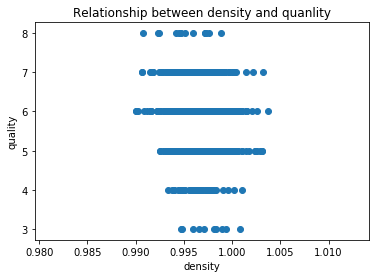

In [21]:
plt.scatter(X_train['density'], y_train)
plt.xlabel('density')
plt.ylabel('quality')
plt.title('Relationship between density and quanlity')

In [23]:
# Let's calculate the mean squared error for training set
mseTrain = np.mean((y_train - model.predict(X_train))**2)
print('MSE for trainning set '+ str(mseTrain))

mseTest = np.mean((y_test-model.predict(X_test))**2)
print('MSE for testing set '+ str(mseTest))

MSE for trainning set 0.41630829661774527
MSE for testing set 0.42394749546983224


The mean squared error is quite small. Leave it and we're going compare with another appoarch.

Text(0, 0.5, 'residuals')

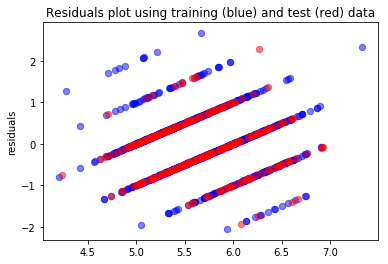

In [24]:
# Plot residuals
plt.scatter(model.predict(X_train), model.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c='r', s=40, alpha=0.5)
plt.title('Residuals plot using training (blue) and test (red) data')
plt.ylabel('residuals')

It seems like there is a relationship. It means that the model is not good.

<h2>Better Appoarch</h2>
<p>Check the relationship between variables first</p>

In [29]:
# Calculate correlation between variables
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


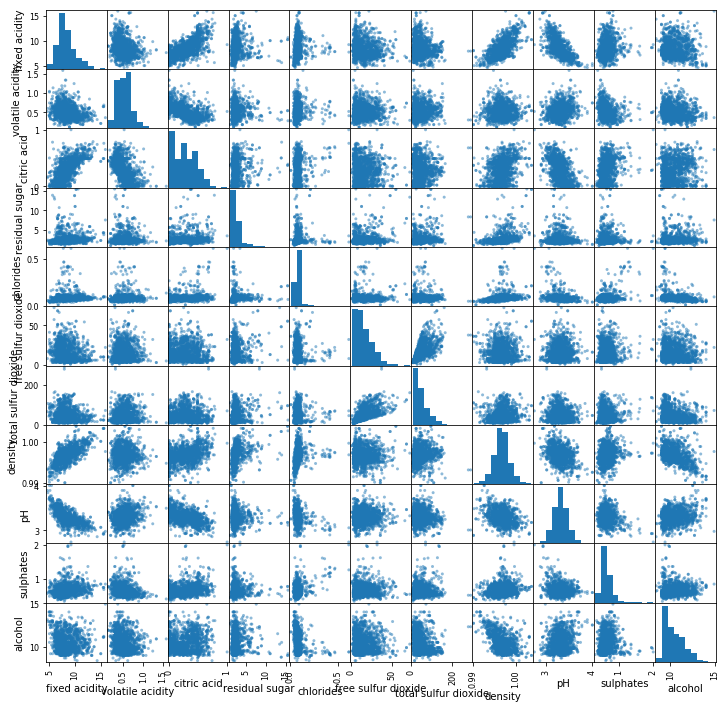

In [42]:
pd.plotting.scatter_matrix(X, figsize=(12,12))
plt.show()

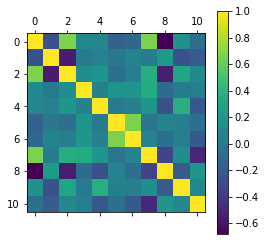

In [43]:
# plot correlation matrix
plt.matshow(X.corr())
plt.colorbar()
plt.show()